# **PROJECT ON DIGIT RECOGNITION**

* *AUTHOR: TUSHAR SINGH*
* *B.Tech - C.O.E*
* *Thapar University, Patiala*

## Importing The Required Packages

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt


## Loading the dataset 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


* MNIST Dataset has been loaded using tensorflow keras API.
* This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
* **x_train:** NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.
* **y_train:** NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
* **x_test:** NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.
* **y_test:** NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.
* Pixel values range from 0 to 255.

## Reshaping the dataset

In [3]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Normalizing the data

In [4]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train = x_train/255.0
x_test = x_test/255.0

* Normalization helps in better learning speed and faster performance.
* It reduces variance and gives same range to all input features.
* Since our dataset sets all inputs to 0 - 255, normalizating only helps reducing variances.

## Displaying some images

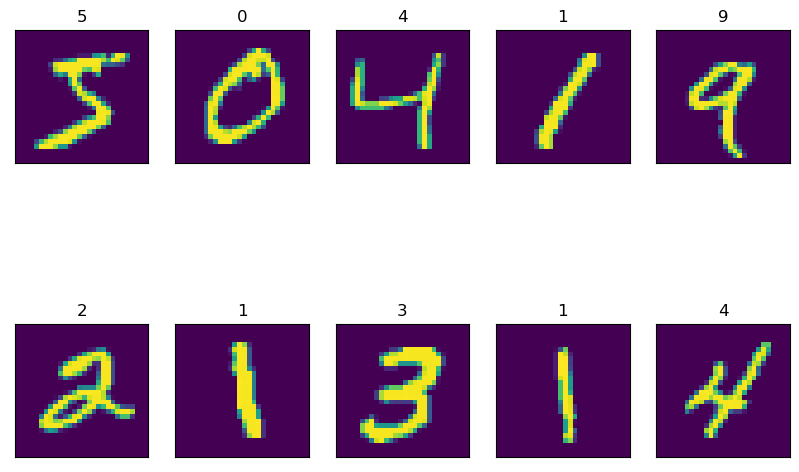

In [5]:
fig = plt.figure(figsize=(10, 7))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks =[], yticks=[])
    ax.imshow(x_train[i])
    ax.set_title(y_train[i])

## Splitting the train data into train and validation data

In [6]:
x_val = x_train[50000 : 60000]
x_train = x_train[0 : 50000]
y_val = y_train[50000 : 60000]
y_train = y_train[0 : 50000]

print("Train data has " + str(x_train.shape[0]) + " samples.")
print("validation data has " + str(x_val.shape[0]) + " samples.")

Train data has 50000 samples.
validation data has 10000 samples.


* Validation during training give advantages.
* It check the performance of training based on validation score.
* We can apply **early stopping** when validation score doesn't improve while train score goes up.
* Overcome **overfitting**.

## Building The Model

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

Metal device set to: Apple M1


2022-11-02 01:32:50.663526: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-02 01:32:50.663639: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [9]:
plot_model(model, 'models/model_cnn.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=15, batch_size=128, verbose=1, validation_data=(x_val, y_val))

Epoch 1/15


2022-11-02 01:32:50.916258: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-02 01:32:51.070219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 0.2477 - accuracy: 0.9234

2022-11-02 01:32:56.453614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 6s 15ms/step - loss: 0.2477 - accuracy: 0.9234 - val_loss: 0.0640 - val_accuracy: 0.9827
Epoch 2/15
391/391 [==============================] - 5s 14ms/step - loss: 0.0832 - accuracy: 0.9739 - val_loss: 0.0498 - val_accuracy: 0.9857
Epoch 3/15
391/391 [==============================] - 6s 14ms/step - loss: 0.0593 - accuracy: 0.9816 - val_loss: 0.0416 - val_accuracy: 0.9884
Epoch 4/15
391/391 [==============================] - 6s 15ms/step - loss: 0.0468 - accuracy: 0.9855 - val_loss: 0.0423 - val_accuracy: 0.9873
Epoch 5/15
391/391 [==============================] - 5s 14ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0332 - val_accuracy: 0.9899
Epoch 6/15
391/391 [==============================] - 5s 14ms/step - loss: 0.0339 - accuracy: 0.9892 - val_loss: 0.0299 - val_accuracy: 0.9911
Epoch 7/15
391/391 [==============================] - 5s 14ms/step - loss: 0.0305 - accuracy: 0.9902 - val_loss: 0.0340 - val_accuracy: 0.9910
Epoch 8/15

In [12]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0230 - accuracy: 0.9936


In [13]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.023029787465929985
Test accuracy: 0.993600070476532


In [14]:
model.save('models/digit_model.h5')

In [15]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,"models/")

ModuleNotFoundError: No module named 'tensorflowjs'